<a href="https://colab.research.google.com/github/DebarajPurohit/Hotel_booking_analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/CAPSTONE PROJECT/PROJECT-1 EDA/HOTEL BOOKING EDA/Hotel Bookings.csv'

In [ ]:
hotel_df = pd.read_csv(file_path)

In [ ]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## DATA CLEANING

In [ ]:
hotel_df_copy=hotel_df.copy()
#replacing the null value of agent and company column
hotel_df_copy[['agent','company']]=hotel_df_copy[['agent','company']].fillna(0)
#finding which country is occuring most of time 
hotel_df_copy['country'].mode()
#replacing the null value 
hotel_df_copy['country'].fillna('PRT',inplace=True)
children_mean=hotel_df_copy['children'].mean()
hotel_df_copy['children'].fillna(children_mean,inplace=True)
# type conversion from float to int
hotel_df_copy[['agent','company','children']]=hotel_df_copy[['agent','company','children']].astype('int64')
# droping the row in which thier number of customer is zero
hotel_df_copy=hotel_df_copy.drop(hotel_df_copy[(hotel_df_copy.children+hotel_df_copy.adults+hotel_df_copy.babies)==0].index)

## In this analysis, we are going to answer the below mentioned questions:-


*   What is **Booking Percentage** and **Cancellation Percentage** between Resort Hotel and City Hotel?
*   What is the **Conversion Rate** of City Hotel and Resort Hotel?
*   What **kind of Trend** is observed in Resort Hotel and City Hotel over the years?
*   Whether in all countries same type of Hotel is preferred? If not, list **top 10 countries having city hotel** as preferred hotel and **top 10 countries having Resort Hotel** as preferred hotel.
*   Do some analysis and figure out the variation in Average Daily Rate(ADR) with room type across different months in the year? 








##1. What is **Booking Percentage** and **Cancellation Percentage** between Resort Hotel and City Hotel?



Before going deep, we have to first analyze what the data is giving us at the outer level. So, we will handle the basic question of which hotel type is preferred more and what are the possible reasons behind it.

As we have made a copy of the original dataframe **hotel_df**, going further we will use the copy of hotel_df i.e, **hotel_df_copy**.  

In [ ]:
# Creating a Dataframe cancellation_df from hotel_df_copy.
cancellation_df = hotel_df_copy.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
cancellation_df

In [ ]:
cancellation_df

is_canceled,0,1
hotel,,
City Hotel,46084,33079
Resort Hotel,28927,11120


In [ ]:
#Rename the column name from 0 & 1 to canceled bookings and confirmed bookings respectively.
cancellation_df.rename(columns = {1:'canceled bookings',0:'confirmed bookings'}, inplace= True)
#Creating a new column to calculate Total Booking as per hotel type
cancellation_df['Total_booking_hotel_wise'] = cancellation_df['confirmed bookings']+ cancellation_df['canceled bookings']
# Creating a variable Total_booking and assigning it the total no. of bookings from 2015 to 2017
Total_booking = cancellation_df['Total_booking_hotel_wise'].sum()
#Calculate the Booking Percentage of Resort hotel and City hotel as compared to Total_booking
cancellation_df['Booking_%_wrt_total_booking'] = (cancellation_df['Total_booking_hotel_wise']/Total_booking)*100
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking
hotel,,,,
City Hotel,46084,33079,79163,66.406342
Resort Hotel,28927,11120,40047,33.593658


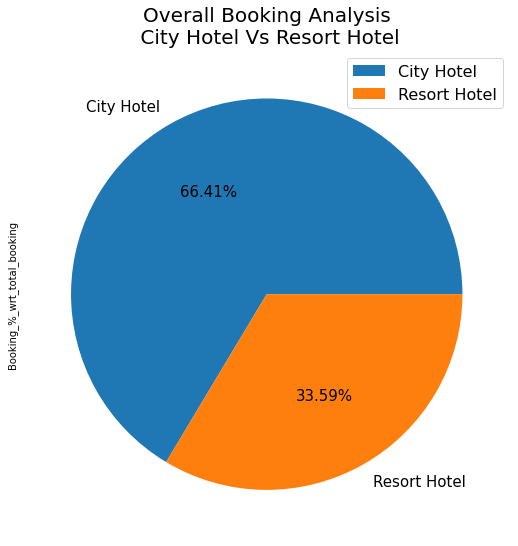

In [ ]:
#Plot the Pie chart to Visualise the booking percentage
ax1= cancellation_df.plot.pie(y='Booking_%_wrt_total_booking',figsize=(10,9),fontsize= 15, autopct='%1.2f%%')
ax1.set_title('Overall Booking Analysis\n City Hotel Vs Resort Hotel', fontsize= 20)
ax1.legend(fontsize= 16)

### As per the given Dataset from the year 2015 to year 2017, City Hotel is preferred by **66.45%** of people. The possible reasons may be because of 
### 1. **Low Cost:** The stay at a city hotel is cheaper as compared to Resort Hotel
### 2. **Easy availability:** The number of City Hotel is more than Resort Hotel 
### The above graph shows overall booking status which includes the cancelled booking also, in futher study, we will dig down and study how the cancellation data is affecting our above data?

In [ ]:
# Total_Cancellation will store the summation of column canceled booking
Total_cancellation = cancellation_df['canceled bookings'].sum()
#creating a column to show the Overall cancellation Percentage
cancellation_df['cancellation_%_wrt_total_booking'] = (cancellation_df['canceled bookings']/Total_booking)*100
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking,cancellation_%_wrt_total_booking
hotel,,,,,
City Hotel,46084,33079,79163,66.406342,27.748511
Resort Hotel,28927,11120,40047,33.593658,9.328077


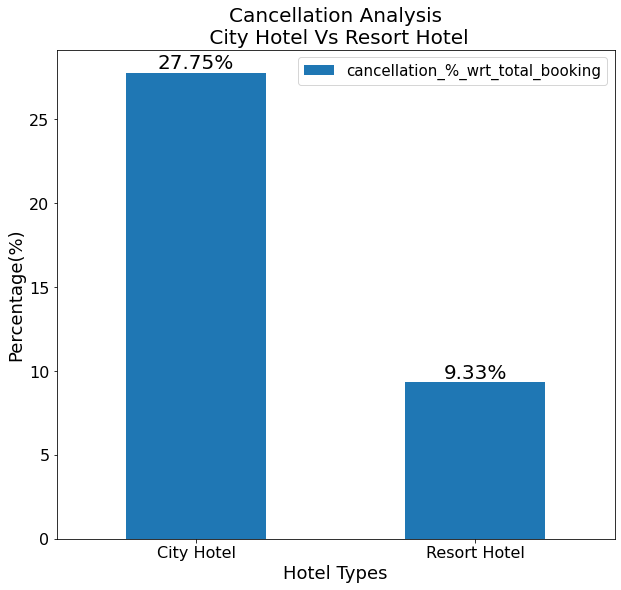

In [ ]:
#Plotting the Overall cancellation Percentage of both City Hotel and Resort Hotel
ax1 = cancellation_df.plot.bar(y= 'cancellation_%_wrt_total_booking', figsize= (10,9), fontsize=16,rot=0)
ax1.set_title('Cancellation Analysis\n City Hotel Vs Resort Hotel', fontsize=20)
ax1.legend(fontsize=15)
ax1.set_xlabel('Hotel Types', fontsize=18)
ax1.set_ylabel('Percentage(%)', fontsize=18)
for index, data in enumerate(cancellation_df['cancellation_%_wrt_total_booking']):
  plt.text(x= index,y=data+0.25, s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

##**The results are quite unexpected!!**

City_hotel has cancellation of almost 3 times the cancellation of Resort Hotel. The difference was quite massive. This study also give some below mentioned insights.
1. Easy availability which was a factor in increasing the booking is also responsible for cancellation as the customer has more choice.
2. The another factor is same as above i.e., Cheap Pricing. As the competition is more between City Hotels, the pricing of hotels tends to be in the lower side. It gives customer more options to choose from at a cheaper price.

Let's find out the conversion rate of both hotel types. Coversion Rate tells us out of 100 hotels booked, how many will be converted to a confirmed booking.

##2. What is the **Conversion Rate** of City Hotel and Resort Hotel?

In [ ]:
# Calculate conversion Rate
cancellation_df['conversion Rate'] = (cancellation_df['confirmed bookings']/cancellation_df['Total_booking_hotel_wise'])*100

In [ ]:
cancellation_df

is_canceled,confirmed bookings,canceled bookings,Total_booking_hotel_wise,Booking_%_wrt_total_booking,cancellation_%_wrt_total_booking,conversion Rate
hotel,,,,,,
City Hotel,46084,33079,79163,66.406342,27.748511,58.214065
Resort Hotel,28927,11120,40047,33.593658,9.328077,72.232627


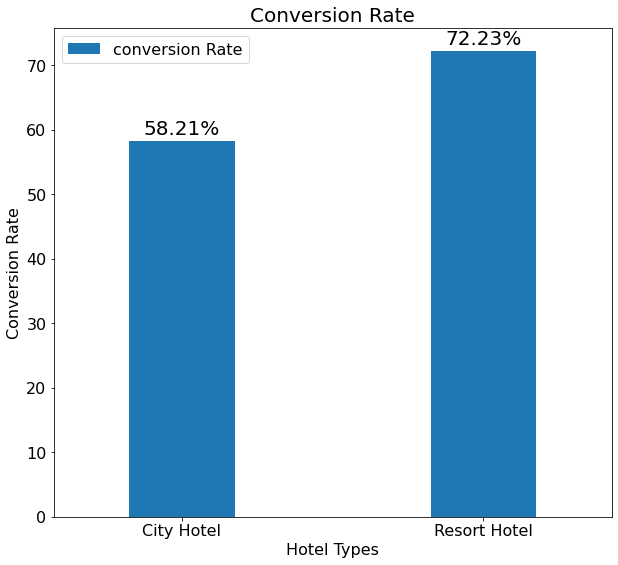

In [ ]:
# Plotting the bar graph to visualize the conversion rate
ax1 = cancellation_df.plot.bar(y='conversion Rate',figsize= (10,9), width=0.35, fontsize=16, rot=0)
ax1.set_title('Conversion Rate', fontsize=20)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax1.legend(fontsize=16)
for index,data in enumerate(cancellation_df['conversion Rate']):
  plt.text(x=index , y =data+1 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

## **Another Boomer!!**

Really saying, I didn't expect that! 

The conversion rate of City Hotel is near to 58% while for Resort Hotel, it is above 70%.

From Resort Hotel point of view, we can say that, these types of hotel are premium in nature and booked after various types of planning. These hotels are generally used as vacation spots or function spots. Hence, the chances of being cancelled is quite less. The same thing, our data is showing above that conversion rate is much higher that City Hotel.


In the above questions, we have seen tried to study and compare City Hotel type and resort Hotel Type with each other. Now, we are going to analyse over the years how the trends is changing in both the hotel types. Whether with each year, bookings are increasing, decreasing, or not changing.

##3. What **kind of Trend** is observed in Resort Hotel and City Hotel over the years?

We will create a dataframe **year_wise_df**, which carries the information of canceled booking, confirmed bookings, and the bookings that are NO Show.

In [ ]:
year_wise_df = hotel_df_copy.groupby(['arrival_date_year','hotel','reservation_status'])[['reservation_status']].count().unstack()
year_wise_df['total_booking'] = year_wise_df.sum(level=0, axis=1)
year_wise_df['valid_booking %'] = (year_wise_df[('reservation_status','Check-Out')]/year_wise_df[('total_booking','')])*100
year_wise_df

reservation_status  ... total_booking
reservation_status                       Canceled  ...              
arrival_date_year hotel                            ...              
2015              City Hotel                 5881  ...         13658
                  Resort Hotel               2069  ...          8309
2016              City Hotel                14842  ...         38059
                  Resort Hotel               4815  ...         18564
2017              City Hotel                11441  ...         27446
                  Resort Hotel               3945  ...         13174

[6 rows x 4 columns]

In [ ]:
# Create DataFrame from the elemnets of year_wise_df to get the year_wise percentage of booking
valid_booking_df = year_wise_df.groupby(['hotel','arrival_date_year'])['valid_booking %'].mean().unstack()

In [ ]:
valid_booking_df

arrival_date_year,2015,2016,2017
hotel,,,
City Hotel,56.047738,59.547019,57.443708
Resort Hotel,74.268865,73.453997,69.227266


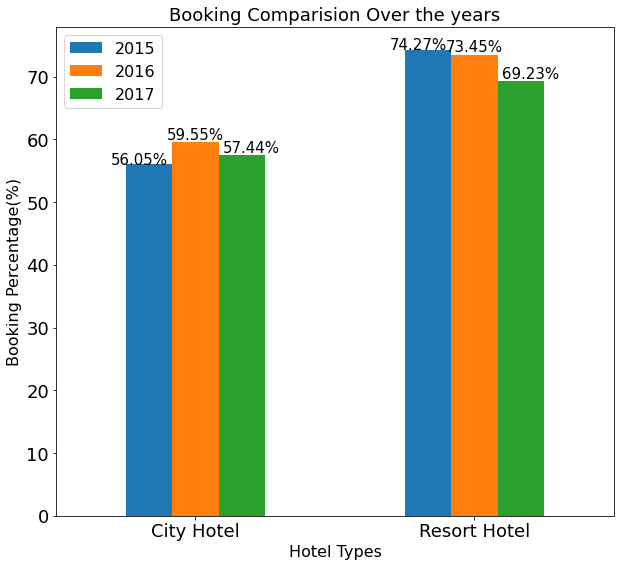

In [ ]:
# Codes to plot the graphs
ax1=valid_booking_df.plot.bar(figsize = (10,9), fontsize = 18, rot=0)
ax1.set_title('Booking Comparision Over the years', fontsize= 18)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Booking Percentage(%)', fontsize=16)
ax1.legend(fontsize=16)
for index,data in enumerate(valid_booking_df[2015]):
  plt.text(x=index-0.20 , y =data , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')
for index,data in enumerate(valid_booking_df[2016]):
  plt.text(x=index , y =data+0.5 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')
for index,data in enumerate(valid_booking_df[2017]):
  plt.text(x=index+0.20 , y =data+0.5 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')

## **What is the trend?**
We can clearly in the above graph that City Hotel has a rise in booking in the year 2016 but there is again a dcline in 2017 but in Resort Hotel, there is clear decline trend over the years from 2015 to 2017

##4. Whether in all countries same type of Hotel is preferred? If not, list **top 10 countries having city hotel** as preferred hotel and **top 10 countries having Resort Hotel** as preferred hotel.

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## In the country column there are 488 rows with NaN data. Since there isn't any other column giving us any hint about data that should be in country column against NaN value, it is better to delete the rows for proper analysis.

In [ ]:
# Getting only non Nan values from hotel_df to country_df_withno_na DataFrame
country_df_withno_na= hotel_df.loc[~hotel_df['country'].isna()]

In [ ]:
country_df_withno_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

In [ ]:
#Getting the country name and respective Resort Hotel and City Hotel bookings count
country_wise_booking_df= country_df_withno_na.groupby(['country','hotel'],sort= False)[['hotel']].count().unstack()

In [ ]:
country_wise_booking_df.head(15)

hotel           
hotel   Resort Hotel City Hotel
country                        
PRT          17630.0    30960.0
GBR           6814.0     5315.0
USA            479.0     1618.0
ESP           3957.0     4611.0
IRL           2166.0     1209.0
FRA           1611.0     8804.0
ROU            177.0      323.0
NOR            123.0      484.0
OMN             11.0        7.0
ARG             57.0      157.0
POL            333.0      586.0
DEU           1203.0     6084.0
BEL            448.0     1894.0
CHE            435.0     1295.0
CN             710.0      569.0

In [ ]:
country_wise_booking_df.columns

MultiIndex([('hotel', 'Resort Hotel'),
            ('hotel',   'City Hotel')],
           names=[None, 'hotel'])

## *Countries where Resort Hotels are more preferred over City Hotels*
Due to less price and easy availability, in most of the countries, City Hotels are preferred however you would be excited to know that there are some countries where Resort Hotels are the most preferred hotels. I think, the possible reasons may include but not limited to **the exotic locations**, **great tourist spots** etc.

In [ ]:
Resort_hotel_more_preferred_df = country_wise_booking_df.loc[country_wise_booking_df[('hotel','Resort Hotel')]>country_wise_booking_df[('hotel','City Hotel')],:]

In [ ]:
Resort_hotel_more_preferred_df

hotel           
hotel   Resort Hotel City Hotel
country                        
GBR           6814.0     5315.0
IRL           2166.0     1209.0
OMN             11.0        7.0
CN             710.0      569.0
LVA             33.0       22.0
PRI              9.0        3.0
LTU             46.0       35.0
JAM              5.0        1.0
AND              5.0        2.0
GIB             13.0        5.0
CAF              3.0        2.0
SUR              4.0        1.0

As we have discussed above about countries having Resort Hotel types as most preferred type. Great Britain (GBR) tops this list and the most suprising thing is that the difference between both hotel types is more than 1500 here. The analysis becomes more accurate if the data is shown in terms of percentage. So, lets do that!!!

In [ ]:
# Calculating the Total Bookings in that country, which sums the bookings of City Hotel and Resort Hotel
Resort_hotel_more_preferred_df['Total Bookings'] = Resort_hotel_more_preferred_df.sum(level= 0, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Calculate the Resort Hotel %
Resort_hotel_more_preferred_df['Resort Hotel Booking %'] = (Resort_hotel_more_preferred_df[('hotel','Resort Hotel')]/Resort_hotel_more_preferred_df[('Total Bookings','')])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Calculate the Resort Hotel %
Resort_hotel_more_preferred_df['City Hotel Booking %'] = (Resort_hotel_more_preferred_df[('hotel','City Hotel')]/Resort_hotel_more_preferred_df[('Total Bookings','')])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Resort_hotel_more_preferred_df

hotel             ... Resort Hotel Booking % City Hotel Booking %
hotel   Resort Hotel City Hotel  ...                                            
country                          ...                                            
GBR           6814.0     5315.0  ...              56.179405            43.820595
IRL           2166.0     1209.0  ...              64.177778            35.822222
OMN             11.0        7.0  ...              61.111111            38.888889
CN             710.0      569.0  ...              55.512119            44.487881
LVA             33.0       22.0  ...              60.000000            40.000000
PRI              9.0        3.0  ...              75.000000            25.000000
LTU             46.0       35.0  ...              56.790123            43.209877
JAM              5.0        1.0  ...              83.333333            16.666667
AND              5.0        2.0  ...              71.428571            28.571429
GIB             13.0        5.0  ...              72.222222            27.777778
CAF              3.0        2.0  ...              60.000000            40.000000
SUR              4.0        1.0  ...              80.000000            20.000000

[12 rows x 5 columns]

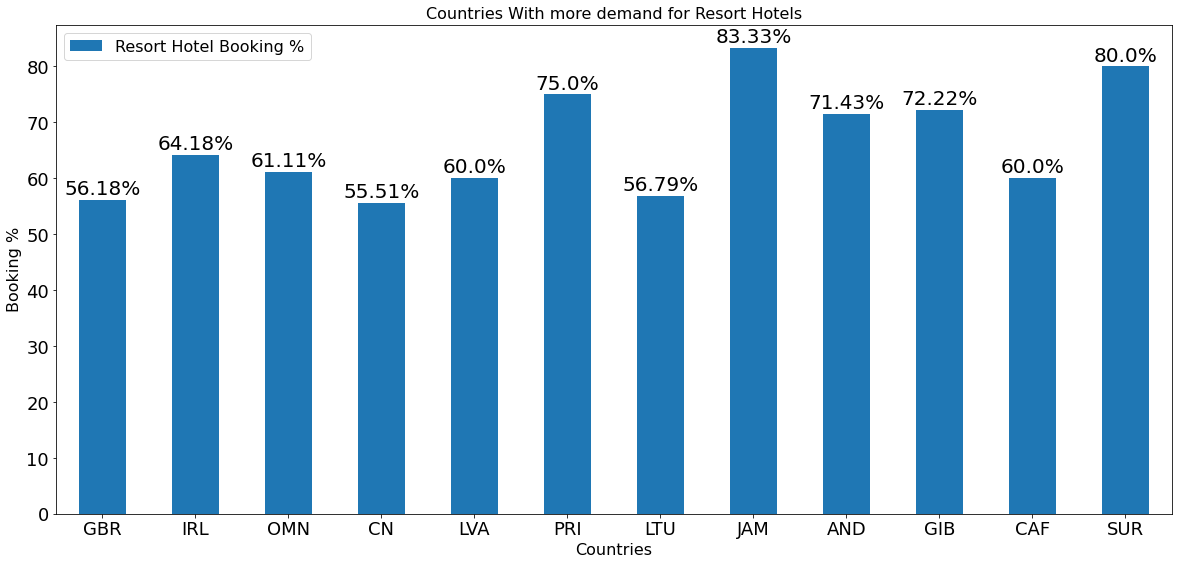

In [ ]:
# Plot the graph for Resort Hotel % across top 10 countries
ax1= Resort_hotel_more_preferred_df.plot.bar(y='Resort Hotel Booking %',figsize = (20,9), fontsize= 18, rot=0)
ax1.set_title("Countries With more demand for Resort Hotels", fontsize=16)
ax1.set_xlabel('Countries', fontsize= 16)
ax1.set_ylabel('Booking %', fontsize=16)
ax1.legend(fontsize= 16, loc='upper left')
for index,data in enumerate(Resort_hotel_more_preferred_df['Resort Hotel Booking %']):
  plt.text(x=index , y =data+1 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

# 5. Type of room and adr distribution across different months

In this process of analysis, it is very important to understand the variation of room types in different time period of the year. From a customer perspective, it will give a clear picture and judgement on selection of rooms.

In [ ]:
# removing that extreme value of ADR
hotel_df_copy=hotel_df_copy.drop(hotel_df_copy[(hotel_df_copy.adr)>5000].index)

In [ ]:
resort_df=hotel_df_copy.loc[hotel_df_copy['hotel']=='Resort Hotel'][['hotel','arrival_date_month','assigned_room_type','adr']]
city_df=hotel_df_copy.loc[hotel_df_copy['hotel']=='City Hotel'][['hotel','arrival_date_month','assigned_room_type','adr']]

In [ ]:
resort_df.head(3)

,hotel,arrival_date_month,assigned_room_type,adr
0,Resort Hotel,July,C,0.0
1,Resort Hotel,July,C,0.0
2,Resort Hotel,July,C,75.0


In [ ]:
# Use groupby to get the adr variation in different months across different room types
adr_resort_df= resort_df.groupby(['arrival_date_month','assigned_room_type'])['adr'].mean().unstack()

In [ ]:
adr_resort_df

assigned_room_type,A,B,C,D,E,F,G,H,I,L,P
arrival_date_month,,,,,,,,,,,
April,66.873139,77.046667,83.957343,73.107093,89.354293,95.302409,136.504626,146.416170,38.080000,NaN,NaN
August,166.188725,166.563429,208.749581,182.832802,192.811411,208.599920,258.959619,273.538226,93.998235,NaN,NaN
December,63.838404,45.606667,87.754175,61.225693,79.698457,89.384186,112.810361,121.037209,21.483333,NaN,NaN
February,50.085972,35.666667,65.746899,50.874748,64.942891,68.446190,90.622190,106.540556,18.406087,NaN,0.0
January,44.696784,34.933333,50.098421,45.669857,60.569833,57.196452,80.680714,87.126071,9.954545,NaN,NaN
July,134.711490,134.564545,168.287872,153.129021,165.809018,180.454595,216.688789,224.651304,57.814048,8.0,NaN
June,95.949922,99.632381,132.758077,98.911147,120.961719,138.513699,167.399392,188.200000,63.673571,NaN,NaN
March,49.637858,51.181818,58.651273,55.352293,68.831207,75.433151,98.382063,97.814706,31.917222,NaN,NaN
May,65.756235,74.947143,78.559804,76.011980,92.894139,101.295125,138.043077,131.376719,33.698039,NaN,NaN


In [ ]:
# Sort the months in dataframe we get above as per their occurance
Months_name=['January','February','March','April','May','June','July','August','September','October','November','December']
adr_resort_df.index=pd.CategoricalIndex(adr_resort_df.index, categories=Months_name, ordered=True)
adr_resort_df = adr_resort_df.sort_index()

In [ ]:
adr_resort_df

assigned_room_type,A,B,C,D,E,F,G,H,I,L,P
arrival_date_month,,,,,,,,,,,
January,44.696784,34.933333,50.098421,45.669857,60.569833,57.196452,80.680714,87.126071,9.954545,NaN,NaN
February,50.085972,35.666667,65.746899,50.874748,64.942891,68.446190,90.622190,106.540556,18.406087,NaN,0.0
March,49.637858,51.181818,58.651273,55.352293,68.831207,75.433151,98.382063,97.814706,31.917222,NaN,NaN
April,66.873139,77.046667,83.957343,73.107093,89.354293,95.302409,136.504626,146.416170,38.080000,NaN,NaN
May,65.756235,74.947143,78.559804,76.011980,92.894139,101.295125,138.043077,131.376719,33.698039,NaN,NaN
June,95.949922,99.632381,132.758077,98.911147,120.961719,138.513699,167.399392,188.200000,63.673571,NaN,NaN
July,134.711490,134.564545,168.287872,153.129021,165.809018,180.454595,216.688789,224.651304,57.814048,8.0,NaN
August,166.188725,166.563429,208.749581,182.832802,192.811411,208.599920,258.959619,273.538226,93.998235,NaN,NaN
September,74.718118,82.830000,99.861278,94.340754,109.018380,124.893871,153.492875,158.724286,64.342857,NaN,NaN


In [ ]:
# replace Nan with 0
adr_resort_df=adr_resort_df.fillna(0)
adr_resort_df

assigned_room_type,A,B,C,D,E,F,G,H,I,L,P
arrival_date_month,,,,,,,,,,,
January,44.696784,34.933333,50.098421,45.669857,60.569833,57.196452,80.680714,87.126071,9.954545,0.0,0.0
February,50.085972,35.666667,65.746899,50.874748,64.942891,68.446190,90.622190,106.540556,18.406087,0.0,0.0
March,49.637858,51.181818,58.651273,55.352293,68.831207,75.433151,98.382063,97.814706,31.917222,0.0,0.0
April,66.873139,77.046667,83.957343,73.107093,89.354293,95.302409,136.504626,146.416170,38.080000,0.0,0.0
May,65.756235,74.947143,78.559804,76.011980,92.894139,101.295125,138.043077,131.376719,33.698039,0.0,0.0
June,95.949922,99.632381,132.758077,98.911147,120.961719,138.513699,167.399392,188.200000,63.673571,0.0,0.0
July,134.711490,134.564545,168.287872,153.129021,165.809018,180.454595,216.688789,224.651304,57.814048,8.0,0.0
August,166.188725,166.563429,208.749581,182.832802,192.811411,208.599920,258.959619,273.538226,93.998235,0.0,0.0
September,74.718118,82.830000,99.861278,94.340754,109.018380,124.893871,153.492875,158.724286,64.342857,0.0,0.0


In [ ]:
# Use groupby to get the adr variation in different months across different room types
adr_city_df= city_df.groupby(['arrival_date_month','assigned_room_type'])['adr'].mean().unstack()
adr_city_df

assigned_room_type,A,B,C,D,E,F,G,K,P
arrival_date_month,,,,,,,,,
April,100.660533,97.074431,107.620000,127.819188,159.179793,191.407067,197.852969,71.364000,0.0
August,100.638361,95.652510,106.828462,138.797752,162.757843,197.797760,222.707475,87.015476,0.0
December,81.228731,83.372394,65.060000,101.782615,126.365875,157.949344,135.149250,49.778636,0.0
February,78.467295,71.902650,76.880000,97.913163,107.134513,153.042193,176.623500,49.138333,NaN
January,78.476215,77.274390,NaN,92.772441,108.701446,136.546780,143.883077,44.203333,NaN
July,97.394711,89.644211,103.992083,137.515175,161.666643,187.227731,227.235682,71.238333,NaN
June,110.955929,106.079485,92.623571,135.349528,160.392180,185.971082,185.538429,64.534286,NaN
March,84.904483,83.693974,83.236923,104.616692,123.910204,160.938681,130.524808,28.730263,NaN
May,111.683030,108.694667,112.957619,139.949887,161.107984,195.327169,202.796706,61.666667,NaN


In [ ]:
# Sort the months in dataframe we get above as per their occurance
adr_city_df.index=pd.CategoricalIndex(adr_city_df.index, categories=Months_name, ordered=True)
adr_city_df = adr_city_df.sort_index()

In [ ]:
adr_city_df

assigned_room_type,A,B,C,D,E,F,G,K,P
arrival_date_month,,,,,,,,,
January,78.476215,77.274390,NaN,92.772441,108.701446,136.546780,143.883077,44.203333,NaN
February,78.467295,71.902650,76.880000,97.913163,107.134513,153.042193,176.623500,49.138333,NaN
March,84.904483,83.693974,83.236923,104.616692,123.910204,160.938681,130.524808,28.730263,NaN
April,100.660533,97.074431,107.620000,127.819188,159.179793,191.407067,197.852969,71.364000,0.0
May,111.683030,108.694667,112.957619,139.949887,161.107984,195.327169,202.796706,61.666667,NaN
June,110.955929,106.079485,92.623571,135.349528,160.392180,185.971082,185.538429,64.534286,NaN
July,97.394711,89.644211,103.992083,137.515175,161.666643,187.227731,227.235682,71.238333,NaN
August,100.638361,95.652510,106.828462,138.797752,162.757843,197.797760,222.707475,87.015476,0.0
September,103.198470,101.627185,123.577647,124.739426,133.003881,176.738111,176.725246,38.458750,NaN


In [ ]:
#replace Nan with 0
adr_city_df = adr_city_df.fillna(0)

In [ ]:
adr_city_df

assigned_room_type,A,B,C,D,E,F,G,K,P
arrival_date_month,,,,,,,,,
January,78.476215,77.274390,0.000000,92.772441,108.701446,136.546780,143.883077,44.203333,0.0
February,78.467295,71.902650,76.880000,97.913163,107.134513,153.042193,176.623500,49.138333,0.0
March,84.904483,83.693974,83.236923,104.616692,123.910204,160.938681,130.524808,28.730263,0.0
April,100.660533,97.074431,107.620000,127.819188,159.179793,191.407067,197.852969,71.364000,0.0
May,111.683030,108.694667,112.957619,139.949887,161.107984,195.327169,202.796706,61.666667,0.0
June,110.955929,106.079485,92.623571,135.349528,160.392180,185.971082,185.538429,64.534286,0.0
July,97.394711,89.644211,103.992083,137.515175,161.666643,187.227731,227.235682,71.238333,0.0
August,100.638361,95.652510,106.828462,138.797752,162.757843,197.797760,222.707475,87.015476,0.0
September,103.198470,101.627185,123.577647,124.739426,133.003881,176.738111,176.725246,38.458750,0.0


Text(0.5, 1.0, 'ADR variation according to Room Type and Months(Resort Hotel)')

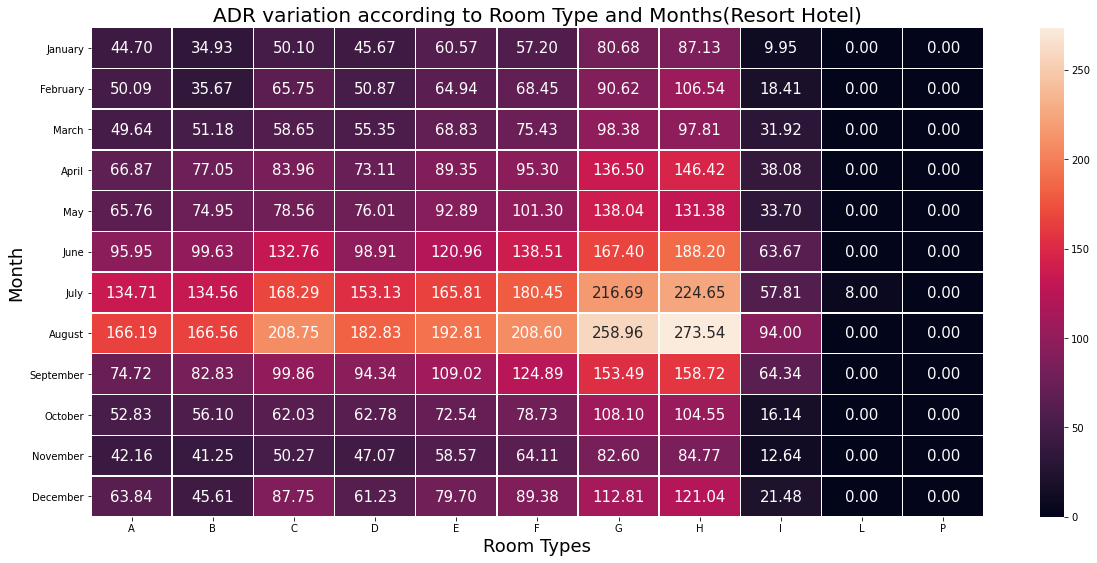

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,9))
sns.heatmap(adr_resort_df,ax= ax1, linewidths=0.5, annot= True, annot_kws={'size':15}, fmt='0.2f')
ax1.set_ylabel('Month', fontsize=18)
ax1.set_xlabel('Room Types', fontsize=18)
ax1.set_title('ADR variation according to Room Type and Months(Resort Hotel)', fontsize=20)


In the above heatmap, we can see that the adr of all rooms is almost at its peak in the month of **July and August**. Room types** H** has the highest ADR of **273.54** in the month of August. If we look closely,**H** has ADR > 100 almost entire year. The second room type that comes after **H** is **G**.

Text(0.5, 1.0, 'ADR variation according to Room Type and Months(City Hotel)')

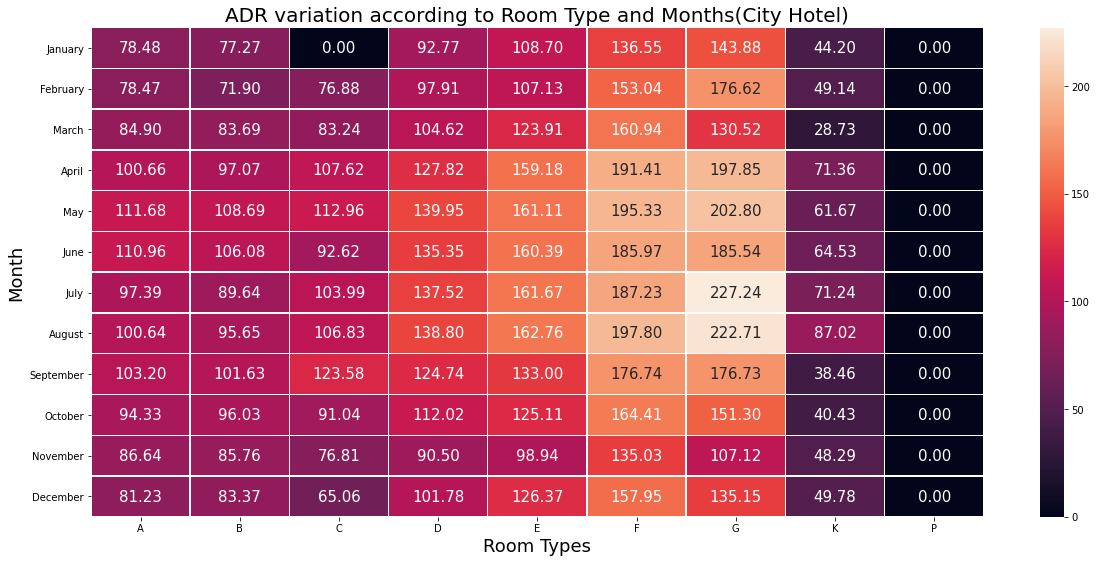

In [ ]:
fig, ax2=plt.subplots(figsize= (20,9))
sns.heatmap(adr_city_df,ax=ax2, linewidths=0.5, annot= True, annot_kws={'size':15}, fmt='0.2f')
ax2.set_ylabel('Month', fontsize=18)
ax2.set_xlabel('Room Types', fontsize=18)
ax2.set_title('ADR variation according to Room Type and Months(City Hotel)', fontsize=20)

In City Hotels, room type **G** has the highest ADR in the month of July. Room type **F** comes after G. These two rooms have ADR > 100 entire year. 

In [ ]:
hotel_df_copy['hotel']=hotel_df_copy['hotel'].convert_dtypes(convert_string= True)

In [ ]:
hotel_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  string 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119385 non-null  float64
 11  babies                          119389 non-null  int64  
 12  meal            